# Radar observation : rainfall composite product, rainfall

The aim of this notebook is to indicate how to read the rainfall data.

For each pixel is indicated a rainfall in hundreth of millimeters (10<sup>-2</sup> mm). If the value is missing then the value is -1.

The data are stored per period of 10 or 11 days per geographic zone (each month is separated in 3 files). The zones called 'NW' (for North-West of France) and 'SE' (for South-East of France).

The time step is 5 min (per day, start hour :00h and end hour : 23h55), the spatial resolution, 1 km.

Remark : the *Basemap* library is required to plot the background map. Here is the command to type into in a terminal to install the package if you use the Anaconda environment : *conda install -c anaconda basemap*

In [1]:
from data_exploration.utils.user_configuration import *
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.basemap import Basemap, cm 


ModuleNotFoundError: No module named 'coordinates_and_projection'

In [2]:
####Cell containing the modifiable fields######
data_path = path + 'radar/rainfall/'   #path to the rainfall data
zone = 'NW'      #study zone 
date_i = '20180501'     #start date of the file
date_f = '20180510'     #end date of the file
#days to select (/!\ each file containts at most 10 or 11 days)
#modifiable field because the data might be too heavy according to the available RAM.
day_i = 1           #number of the first day
day_f = 10           #number of the last day

In [3]:
complete_path = data_path + zone + '/' + str(date_i[0:4]) + '/' + str(date_i[4:6]) + '/'

file = zone+'_'+date_i+'_'+date_f+'_rainfall.npz'      #name of the file containing the rainfalls

nb_per_day = 24*12     #number of files par day (frequency, 5 min)

#coordinates of study zone boundaries
lllat=DOMAINS[zone]['lry']    #lower left latitude
urlat=DOMAINS[zone]['uly']    #upper right latitude
lllon=DOMAINS[zone]['ulx']    #lower left longitude
urlon=DOMAINS[zone]['lrx']    #upper right longitude

In [4]:
#data loading
d = np.load(complete_path+file, allow_pickle=True)
#subset of data from the first day day_i to the last day day_f
data = d['data'][(day_i-1)*nb_per_day:(day_f)*nb_per_day,:,:]      #rainfall values
dates = d['dates'][(day_i-1)*nb_per_day:(day_f)*nb_per_day]        #dates values

Data dimensions: 
<ul>
<li>time dimension(=days number*24*12 -> time frequency of 5min)</li> 
<li>points number for longitude</li>
<li>points number for latitude</li>
</ul>    

In [5]:
data.shape

(2880, 496, 689)

Dimensions of the 'dates' array:
<ul>
    <li>time dimension(=days number*24*12 -> time frequency of 5min)</li>
</ul>

In [6]:
dates.shape

(2880,)

Overview of dates values :

In [7]:
dates

array([datetime.datetime(2018, 5, 1, 0, 0),
       datetime.datetime(2018, 5, 1, 0, 5),
       datetime.datetime(2018, 5, 1, 0, 10), ...,
       datetime.datetime(2018, 5, 10, 23, 45),
       datetime.datetime(2018, 5, 10, 23, 50),
       datetime.datetime(2018, 5, 10, 23, 55)], dtype=object)

Overview of data of type int16

In [8]:
data

array([[[-1, -1, -1, ..., 27, 29, 26],
        [-1, -1, -1, ..., 26, 25, 25],
        [-1, -1, -1, ..., 23, 25, 25],
        ...,
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0]],

       [[-1, -1, -1, ..., 27, 29, 26],
        [-1, -1, -1, ..., 26, 25, 25],
        [-1, -1, -1, ..., 23, 25, 25],
        ...,
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0]],

       [[-1, -1, -1, ..., 31, 24, 24],
        [-1, -1, -1, ..., 33, 30, 30],
        [-1, -1, -1, ..., 35, 31, 31],
        ...,
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0]],

       ...,

       [[-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0],
        ...,
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0,  0],
        [-1, -1, -1, ...,  0,  0

Set of possible values over the chosen period at the beggining of the notebook 

In [9]:
np.unique(data)

array([  -1,    0,    1, ..., 2590, 2956, 3156], dtype=int16)

Plot example for a given time step and a given zone :

<IPython.core.display.Javascript object>


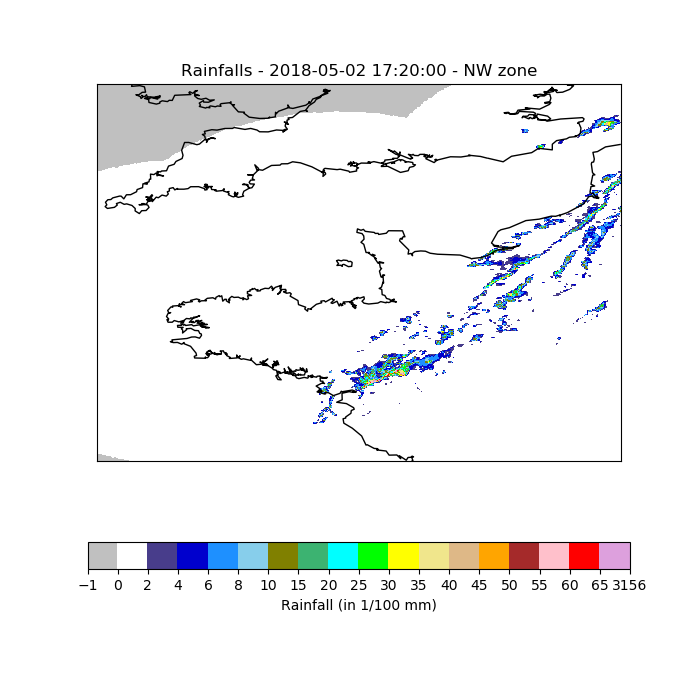

C:\Users\chabotv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\chabotv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [10]:
index = 496      #index of time dimension
fig,ax=plt.subplots(1,1,figsize=(7,7))

#background map definition : coordinates of corners, resolution, projection type
m = Basemap(epsg=n_epsg,resolution='i',llcrnrlat=lllat,
                  urcrnrlat=urlat,
                  llcrnrlon=lllon,
                  urcrnrlon=urlon)

#colorbar definition
if (np.max(data) > 65):
    borne_max = np.max(data)
else:
    borne_max = 65 + 10
cmap = colors.ListedColormap(['silver','white', 'darkslateblue', 'mediumblue','dodgerblue', 'skyblue','olive','mediumseagreen'
                                  ,'cyan','lime','yellow','khaki','burlywood','orange','brown','pink','red','plum'])
bounds = [-1,0,2,4,6,8,10,15,20,25,30,35,40,45,50,55,60,65,borne_max]
norm = colors.BoundaryNorm(bounds, cmap.N)

#plot the data and the background map (coastlines and borders)
m.drawcoastlines()
m.drawcountries()
img=m.imshow(data[index,:,:], interpolation='none', origin='upper',cmap=cmap, norm=norm)
plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds, orientation= 'horizontal').set_label('Rainfall (in 1/100 mm)')
plt.title("Rainfalls - "+ str(dates[index]) + " - "+  zone + " zone")
plt.show()

In [11]:
d.fid.close()